## Sample PCA Analysis
* Principal Component Analysis (PCA) is a powerful tool in data analysis that helps to reduce the dimensionality of large datasets while maintaining the most relevant information
* Here, we'll use PCA to isolate alpha factors in stock data to help create a profitable strategy
* We will download data using yfinance for 10 stocks in 3 different sectors.

### What is a Alpha Factor in stock data?
* First, there are five popular risk ratios in investing: alpha, beta, sd, r2, and Sharpe ratio.
* Alpha is based on a calculation that measures how well a stock has performed.
* An Alpha stock of 1.0 is on that has exceeded its benchmark.

In [4]:
import yfinance as yf
import pandas as pd

In [2]:
# Download data
tech_tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG']
bank_tickers = ['JPM', 'BAC', 'GS', 'MS']
finance_tickers = ['MA', 'AXP']

In [6]:
tech_data = yf.download(tech_tickers, start='2015-01-01', end='2023-03-24')['Adj Close']
finance_data = yf.download(finance_tickers, start='2015-01-01', end='2023-03-24')['Adj Close']
bank_data = yf.download(bank_tickers, start='2015-01-01', end='2023-03-24')['Adj Close']

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  4 of 4 completed


In [7]:
# Combine data into a single DataFrame
data = pd.concat([tech_data, finance_data, bank_data], axis=1)
data.columns = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'JPM', 'BAC', 'GS', 'MS', 'MA', 'AXP']
data

,AAPL,MSFT,AMZN,GOOG,JPM,BAC,GS,MS,MA,AXP
Date,,,,,,,,,,
2015-01-02,24.565699,15.426000,26.168653,40.709465,82.201294,81.394279,15.267414,167.411469,49.936501,31.525978
2015-01-05,23.873638,15.109500,25.623152,40.335114,80.027412,79.104813,14.823895,162.184402,48.386219,30.540529
2015-01-06,23.875893,14.764500,25.029282,39.743095,78.321861,78.933823,14.380367,158.903519,47.131622,29.660963
2015-01-07,24.210678,14.921000,24.986401,40.248055,80.032433,80.161659,14.448601,161.271606,47.203548,30.084461
2015-01-08,25.140909,15.023000,25.065184,41.432060,81.166901,81.408524,14.747129,163.846375,48.258369,30.532391
...,...,...,...,...,...,...,...,...,...,...
2023-03-17,155.000000,98.949997,102.459999,279.429993,156.520004,349.660004,27.820000,303.540009,125.809998,84.180000
2023-03-20,157.399994,97.709999,101.930000,272.230011,158.740005,349.320007,27.750000,309.529999,127.139999,85.639999
2023-03-21,159.279999,100.610001,105.839996,273.779999,164.559998,354.570007,28.590000,317.279999,130.550003,88.760002


## PCA Model
* Fit a PCA model to the returns data
* Use PCA class fomr sklean

In [12]:
from sklearn.decomposition import PCA

In [13]:
# Calculate the daily returns by taking the percentage change of the adjusted close price for each stock.
# Remove weekends 
returns = data.pct_change().dropna()

In [16]:
# Fit PCA model
pca = PCA(n_components=3)
pca.fit(returns)

PCA(n_components=3)

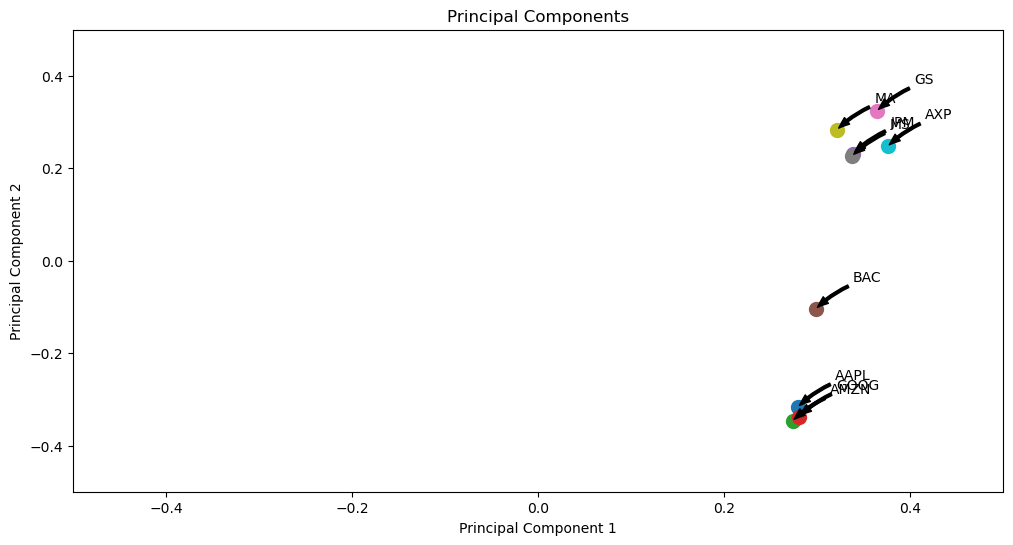

In [17]:
#The principal components represent the directions in the data that contain the most variance
import matplotlib.pyplot as plt
# Plot principal components
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax.scatter(x, y, marker='o', s=100)
    ax.annotate(returns.columns[i], xy=(x, y), xytext=(x+0.04, y+0.06),
                arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=6, headlength=8, connectionstyle='arc3,rad=0.1'))

ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Principal Components')
plt.show()

In [18]:
#Isolate alpha factors
#The alpha factor for each stock is simply the projection of the stock returns onto each principal component.

alpha_factors = pd.DataFrame()
for i in range(3):
    alpha_factors[f'alpha_{i+1}'] = returns.dot(pca.components_[i])

# Add alpha factors to returns data
alpha_returns = pd.concat([alpha_factors, returns], axis=1)

In [19]:
alpha_returns.head()

,alpha_1,alpha_2,alpha_3,AAPL,MSFT,AMZN,GOOG,JPM,BAC,GS,MS,MA,AXP
Date,,,,,,,,,,,,,
2015-01-05,-0.081916,-0.005697,0.000083,-0.028172,-0.020517,-0.020846,-0.009196,-0.026446,-0.028128,-0.029050,-0.031223,-0.031045,-0.031258
2015-01-06,-0.061357,-0.007959,-0.018567,0.000094,-0.022833,-0.023177,-0.014677,-0.021312,-0.002162,-0.029920,-0.020229,-0.025929,-0.028800
2015-01-07,0.034538,-0.001647,-0.010249,0.014022,0.010600,-0.001713,0.012706,0.021840,0.015555,0.004745,0.014903,0.001526,0.014278
2015-01-08,0.056850,-0.004951,-0.008374,0.038422,0.006836,0.003153,0.029418,0.014175,0.015554,0.020661,0.015965,0.022346,0.014889
2015-01-09,-0.040294,-0.006407,-0.005409,0.001073,-0.011749,-0.012951,-0.008405,-0.012666,-0.012744,-0.017930,-0.015347,-0.017387,-0.016271


## Visualize alpha factors
*  we can plot a scatter matrix of the alpha factors using the pairplot() function from the Seaborn library.
* If the relationship between two alpha factors is linear, the scatter plot will show a clear pattern
* If the relationship is non-linear, the scatter plot will be more scattered and less organized
* If the alpha factors are highly correlated with each other, it may be necessary to use techniques such as regularization or dimensionality reduction to avoid overfitting and improve the robustness of the portfolio construction process

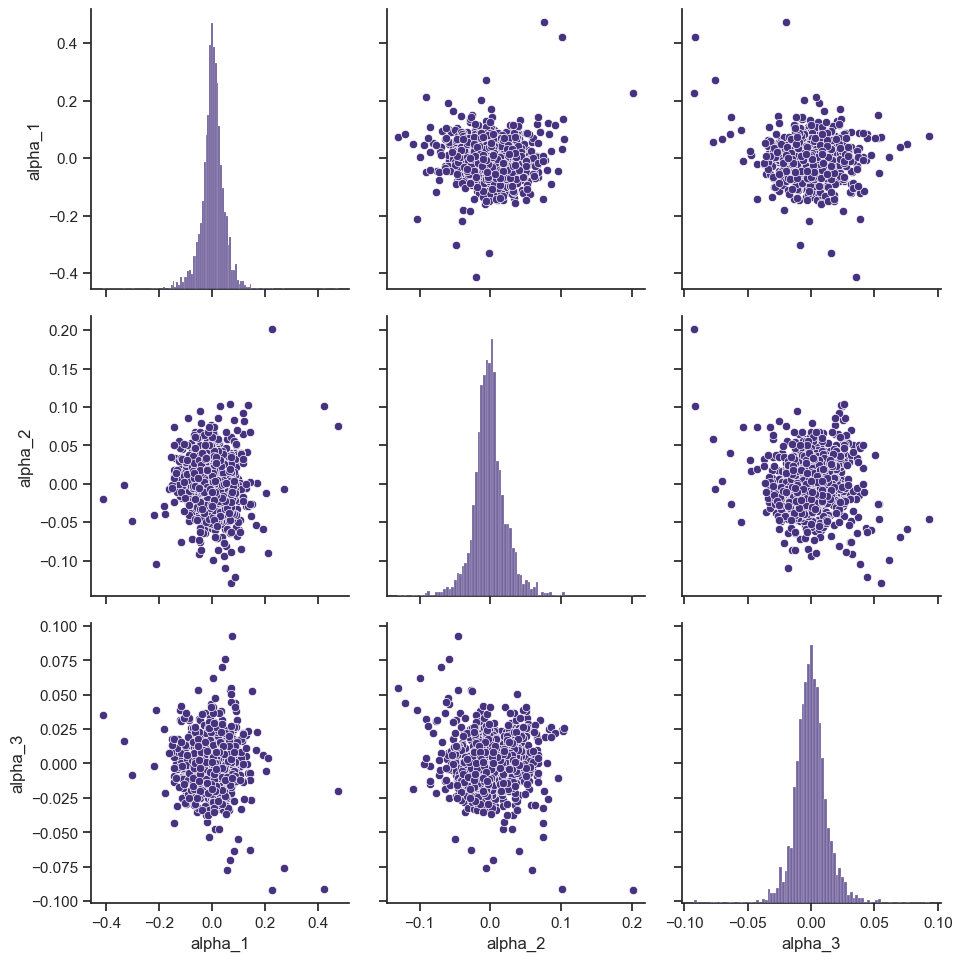

In [22]:
import seaborn as sns
sns.set(style='ticks', palette='viridis')
g = sns.pairplot(alpha_factors)
g.fig.set_size_inches(10,10)
plt.show()

## Evaluate the performance of alpha factors
* Calculate the alpha of each stock by regressing its returns against each alpha factor
* The alpha represents the excess return of the stock after controlling for its exposure to the alpha factor.

In [25]:
import statsmodels.api as sm

# Calculate alpha
alpha = pd.DataFrame()
for i in range(3):
    model = sm.OLS(alpha_returns.iloc[:, 3+i], alpha_returns.iloc[:, :3])
    results = model.fit()
    alpha[f'alpha_{i+1}'] = results.params
alpha_mean = alpha.mean()
alpha_std = alpha.std()
print(f'Mean alpha: \n{alpha_mean}')
print('='*50)
print(f'Std alpha: \n{alpha_std}')

Mean alpha: 
alpha_1   -0.081293
alpha_2    0.070092
alpha_3   -0.032391
dtype: float64
Std alpha: 
alpha_1    0.317268
alpha_2    0.548451
alpha_3    0.310009
dtype: float64


## Returns

*After calculating the alpha for each stock and each alpha factor, we can plot the cumulative returns of the alpha factors to visualize their performance over time.

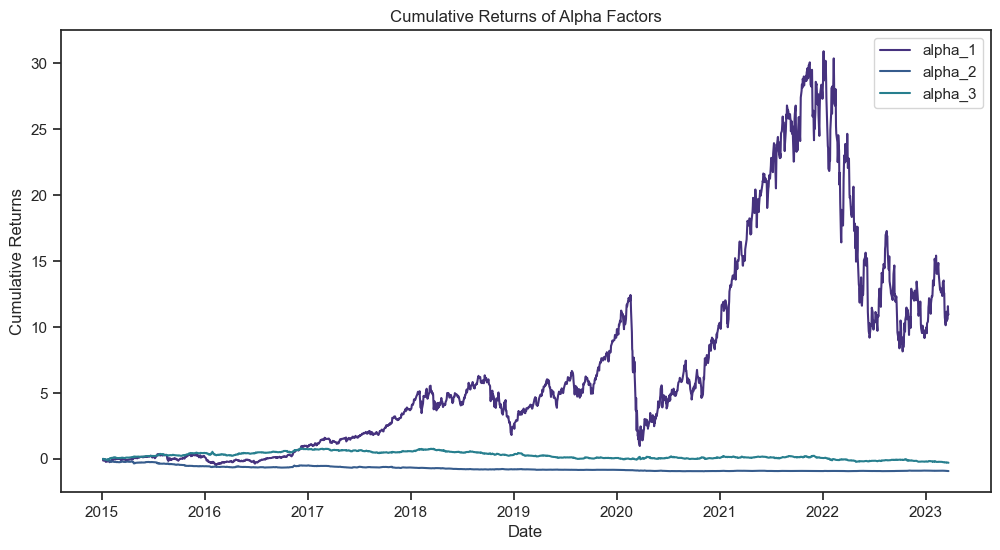

In [26]:
# Cumulative returns
alpha_cum_returns = (1 + alpha_factors).cumprod() - 1

# Plot returns
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
ax.plot(alpha_cum_returns)
ax.legend(alpha_cum_returns.columns)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Cumulative Returns of Alpha Factors')
plt.show()

## Correlation
* Calculate the correlation between each alpha factor and the stock returns to see how well each alpha factor explains the variation in the stock returns.

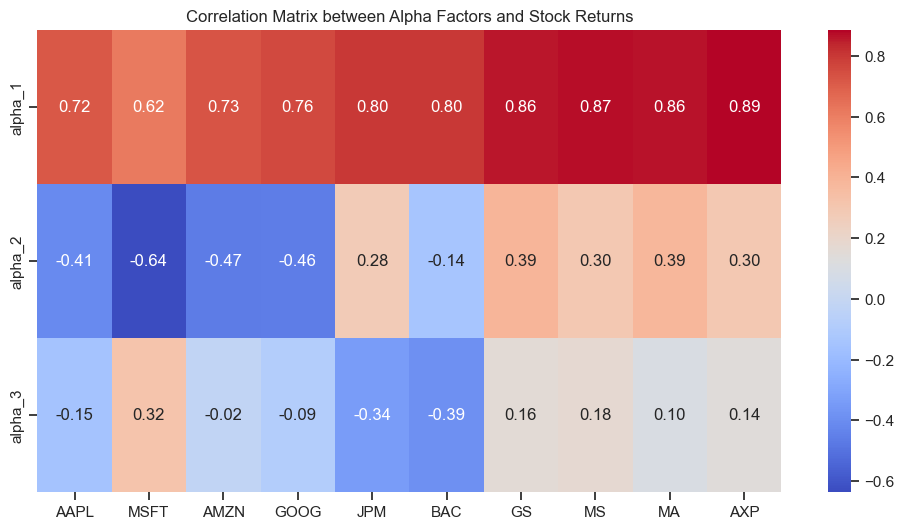

In [28]:
# Calculate correlation 
corr_matrix = alpha_returns.corr()
alpha_corr = corr_matrix.iloc[:3, 3:]

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
sns.heatmap(alpha_corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)
plt.title('Correlation Matrix between Alpha Factors and Stock Returns')
plt.show()

## Sharpe Ratio
* calculate the Sharpe ratio of each alpha factor to measure its risk-adjusted performance. 
* The Sharpe ratio is defined as the ratio of the excess return of an asset over the risk-free rate to its standard deviation.
* np.sqrt(252) is the annualized square root of the number of trading days per year
* alpha.mean() is the mean alpha across all stocks and all alpha factors
* alpha.std() is the standard deviation of the alpha
* Use the Sharpe ratio to compare the risk-adjusted performance of different factors and make informed investment decisions.


In [30]:
import numpy as np
# Calculate alpha factors sharpe ratio
sharpe_ratio = alpha.mean() / alpha.std() * np.sqrt(252)
print(f'Sharpe ratio: \n{sharpe_ratio}')

Sharpe ratio: 
alpha_1   -4.067497
alpha_2    2.028758
alpha_3   -1.658639
dtype: float64
